In [1]:
import pandas as pd
import numpy

import matplotlib.pyplot as plt

from tslearn.utils import to_time_series_dataset

In [24]:
time_series = pd.read_csv("/Users/joe/Jupyter/Sickle-trait_RNA-seq/salmonQuant/data/counts/TPMs_dropVSA.csv", index_col='ORF')

time_series_sub = time_series[(time_series != 0).all(1)]
time_series_sub = time_series_sub.sample(frac=.2, axis = 0)

idx = list(time_series_sub.index)

In [25]:
# time_series_sub['median'] = time_series_sub.median(axis = 1)
# time_series_sub = time_series_sub[time_series_sub['median'] > 50]
# time_series_sub = time_series_sub.drop(['median'], axis =1)

ts_3D7 = time_series_sub.iloc[:,:64].copy()
ts_FUP = time_series_sub.iloc[:,64:128].copy()

In [26]:
AA13_3D7 = ts_3D7.iloc[:,:16].copy()
AA13_3D7_sub = AA13_3D7.loc[idx]
AA13_3D7_array = AA13_3D7_sub.to_numpy()
AA13_3D7_data = to_time_series_dataset(AA13_3D7_array)

AA17_3D7 = ts_3D7.iloc[:,16:32].copy()
AA17_3D7_sub = AA17_3D7.loc[idx]
AA17_3D7_array = AA17_3D7_sub.to_numpy()
AA17_3D7_data = to_time_series_dataset(AA17_3D7_array)

AS15_3D7 = ts_3D7.iloc[:,32:48].copy()
AS15_3D7_sub = AS15_3D7.loc[idx]
AS15_3D7_array = AS15_3D7_sub.to_numpy()
AS15_3D7_data = to_time_series_dataset(AS15_3D7_array)

AS16_3D7 = ts_3D7.iloc[:,48:64].copy()
AS16_3D7_sub = AS16_3D7.loc[idx]
AS16_3D7_array = AS16_3D7_sub.to_numpy()
AS16_3D7_data = to_time_series_dataset(AS16_3D7_array)

AA13_FUP = ts_FUP.iloc[:,:16].copy()
AA13_FUP_sub = AA13_FUP.loc[idx]
AA13_FUP_array = AA13_FUP_sub.to_numpy()
AA13_FUP_data = to_time_series_dataset(AA13_FUP_array)

AA17_FUP = ts_FUP.iloc[:,16:32].copy()
AA17_FUP_sub = AA17_FUP.loc[idx]
AA17_FUP_array = AA17_FUP_sub.to_numpy()
AA17_FUP_data = to_time_series_dataset(AA17_FUP_array)

AS18_FUP = ts_FUP.iloc[:,32:48].copy()
AS18_FUP_sub = AS18_FUP.loc[idx]
AS18_FUP_array = AS18_FUP_sub.to_numpy()
AS18_FUP_data = to_time_series_dataset(AS18_FUP_array)

AS19_FUP = ts_FUP.iloc[:,48:64].copy()
AS19_FUP_sub = AS19_FUP.loc[idx]
AS19_FUP_array = AS19_FUP_sub.to_numpy()
AS19_FUP_data = to_time_series_dataset(AS19_FUP_array)

In [9]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, \
    TimeSeriesResampler, TimeSeriesScalerMinMax
from tslearn.clustering import TimeSeriesKMeans
from tslearn import metrics

In [27]:
k = 12
seed = 0

Euclidean k-means
4.006 --> 3.114 --> 3.024 --> 2.981 --> 2.956 --> 2.939 --> 2.932 --> 2.926 --> 2.918 --> 2.913 --> 2.910 --> 2.908 --> 2.908 --> 2.908 --> 2.908 --> 2.908 --> 2.908 --> 2.908 --> 2.908 --> 2.908 --> 2.908 --> 2.907 --> 2.907 --> 


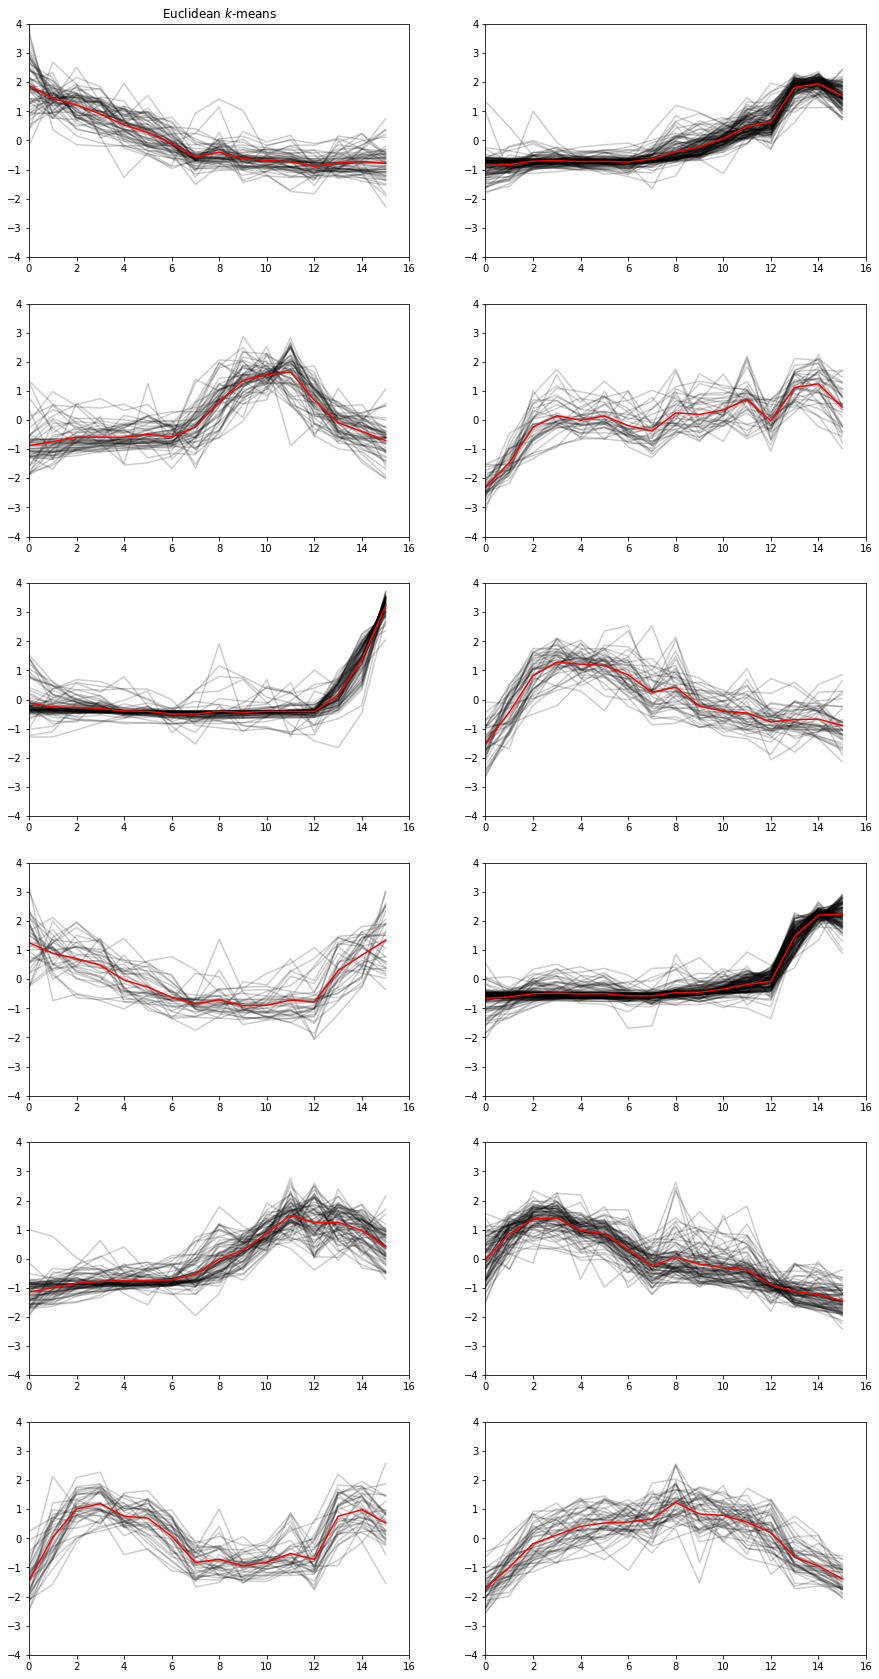

In [28]:
X_train = TimeSeriesScalerMeanVariance().fit_transform(AA13_FUP_data)
sz = X_train.shape[1]

numpy.random.seed(seed)
# Euclidean k-means
print("Euclidean k-means")
km = TimeSeriesKMeans(n_clusters=k, verbose=True, random_state=seed)
y_pred = km.fit_predict(X_train)

plt.figure(figsize=(15,30))
for yi in range(k):
    plt.subplot(k/2, 2, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    if yi == 0:
        plt.title("Euclidean $k$-means")
# plt.savefig('Figures/k-means_AA13_3D7.png')

Euclidean k-means


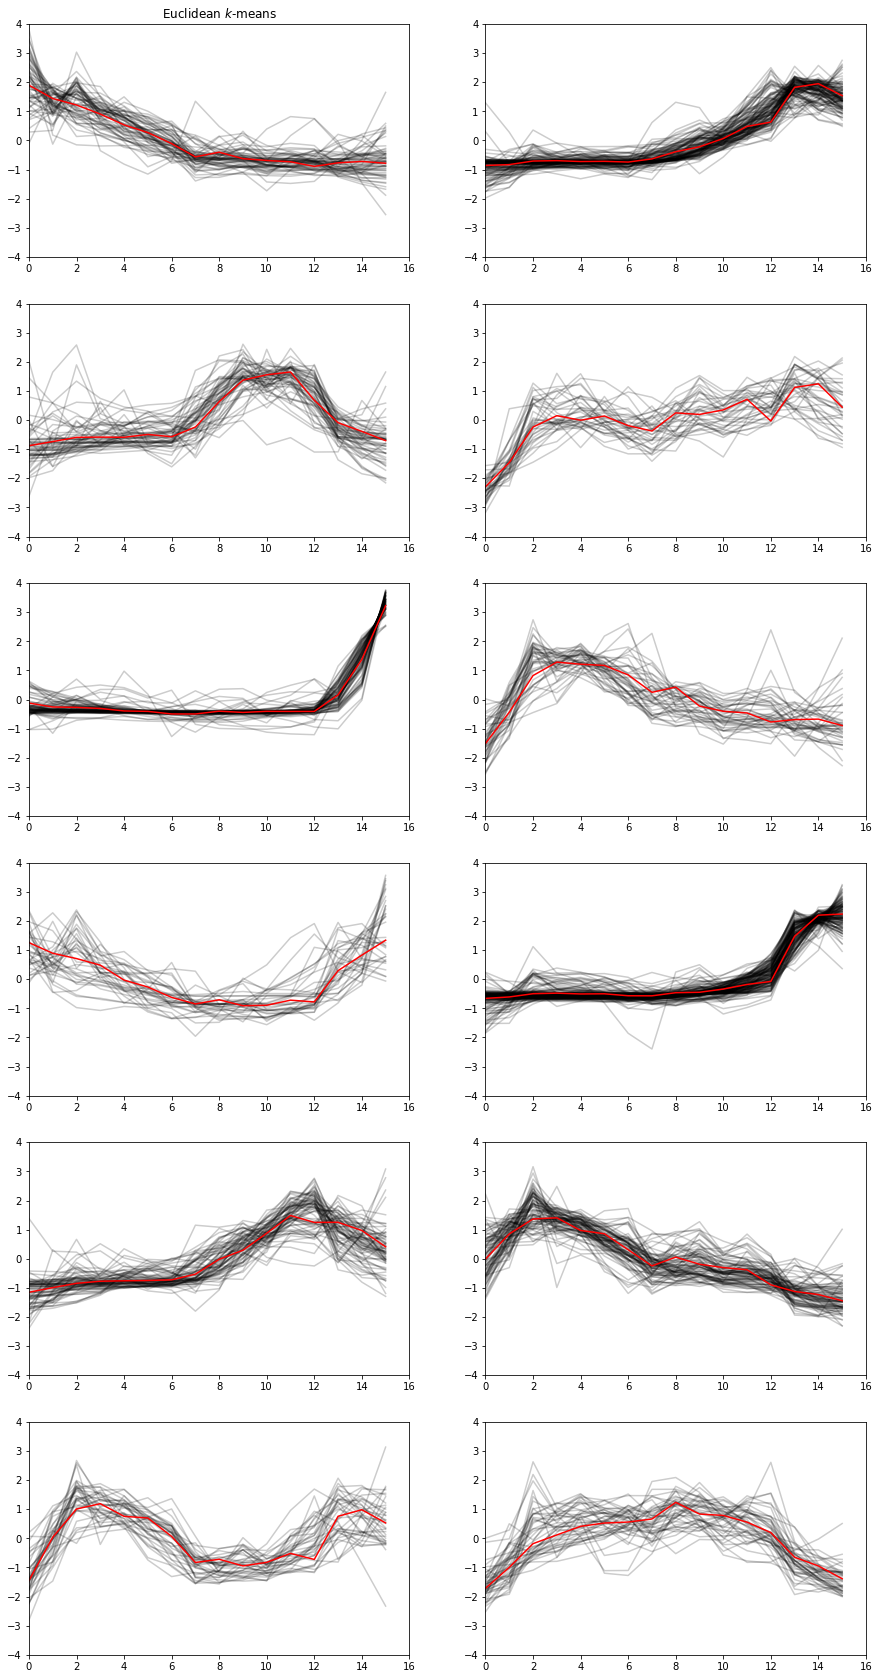

In [29]:
X_test = TimeSeriesScalerMeanVariance().fit_transform(AA17_FUP_data)
sz = X_train.shape[1]

numpy.random.seed(seed)
# Euclidean k-means
print("Euclidean k-means")


plt.figure(figsize=(15,30))
for yi in range(k):
    plt.subplot(k/2, 2, yi + 1)
    for xx in X_test[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    if yi == 0:
        plt.title("Euclidean $k$-means")
# plt.savefig('Figures/k-means_AA13_3D7.png')

Euclidean k-means


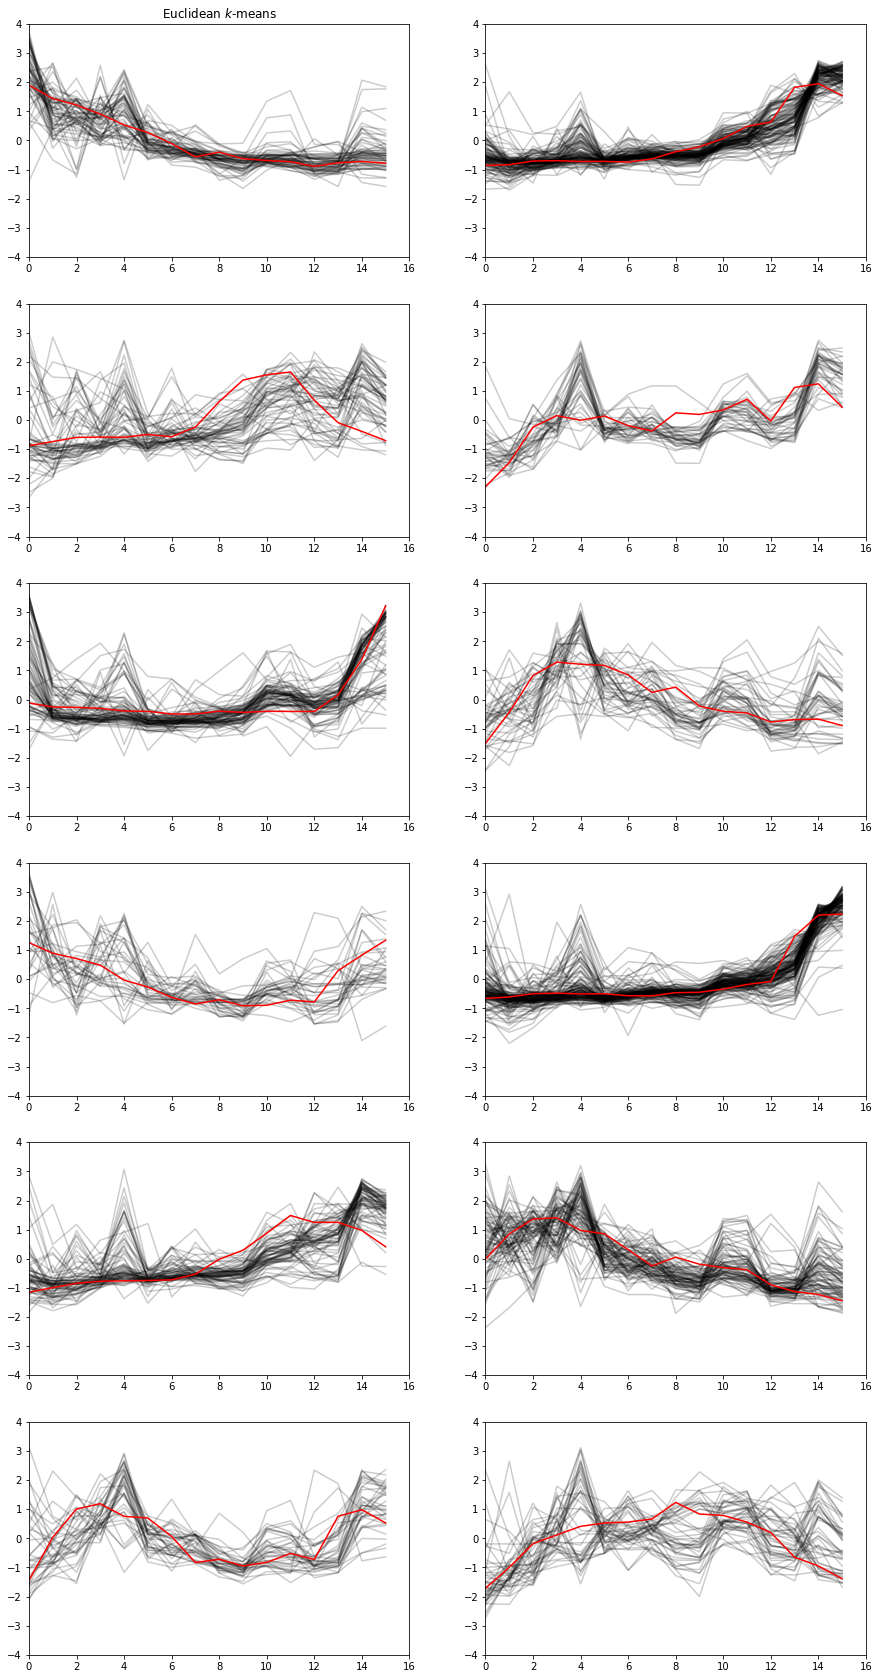

In [31]:
X_test = TimeSeriesScalerMeanVariance().fit_transform(AA13_3D7_data)
sz = X_train.shape[1]

numpy.random.seed(seed)
# Euclidean k-means
print("Euclidean k-means")


plt.figure(figsize=(15,30))
for yi in range(k):
    plt.subplot(k/2, 2, yi + 1)
    for xx in X_test[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    if yi == 0:
        plt.title("Euclidean $k$-means")
# plt.savefig('Figures/k-means_AA13_3D7.png')

Euclidean k-means


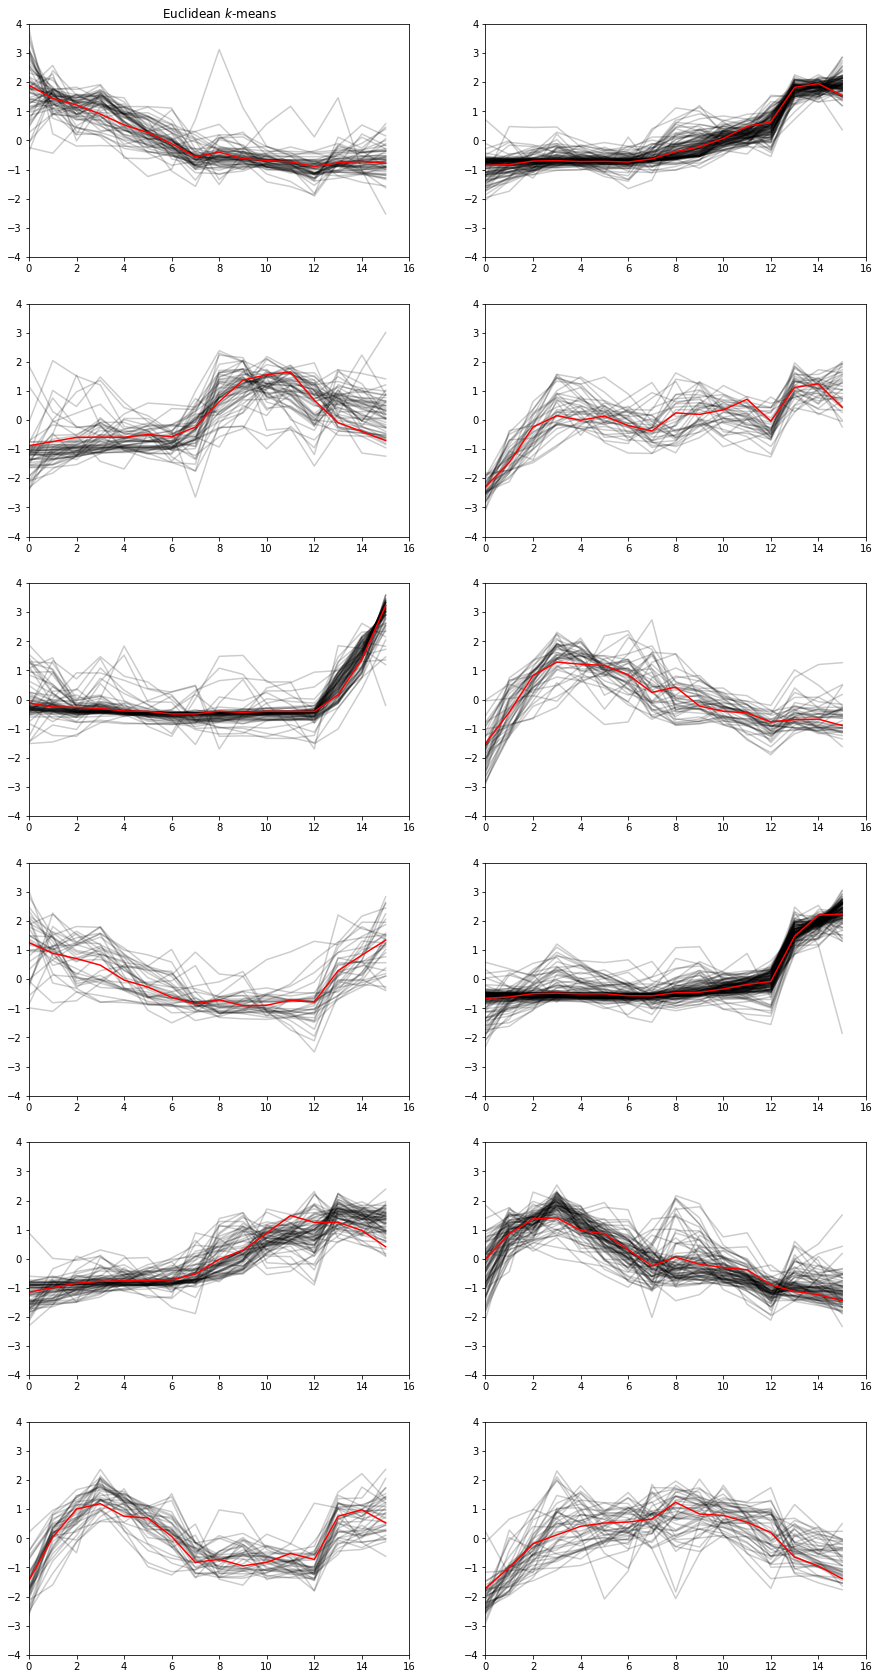

In [32]:
X_test = TimeSeriesScalerMeanVariance().fit_transform(AS18_FUP_data)
sz = X_train.shape[1]

numpy.random.seed(seed)
# Euclidean k-means
print("Euclidean k-means")


plt.figure(figsize=(15,30))
for yi in range(k):
    plt.subplot(k/2, 2, yi + 1)
    for xx in X_test[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    if yi == 0:
        plt.title("Euclidean $k$-means")
# plt.savefig('Figures/k-means_AA13_3D7.png')

Euclidean k-means


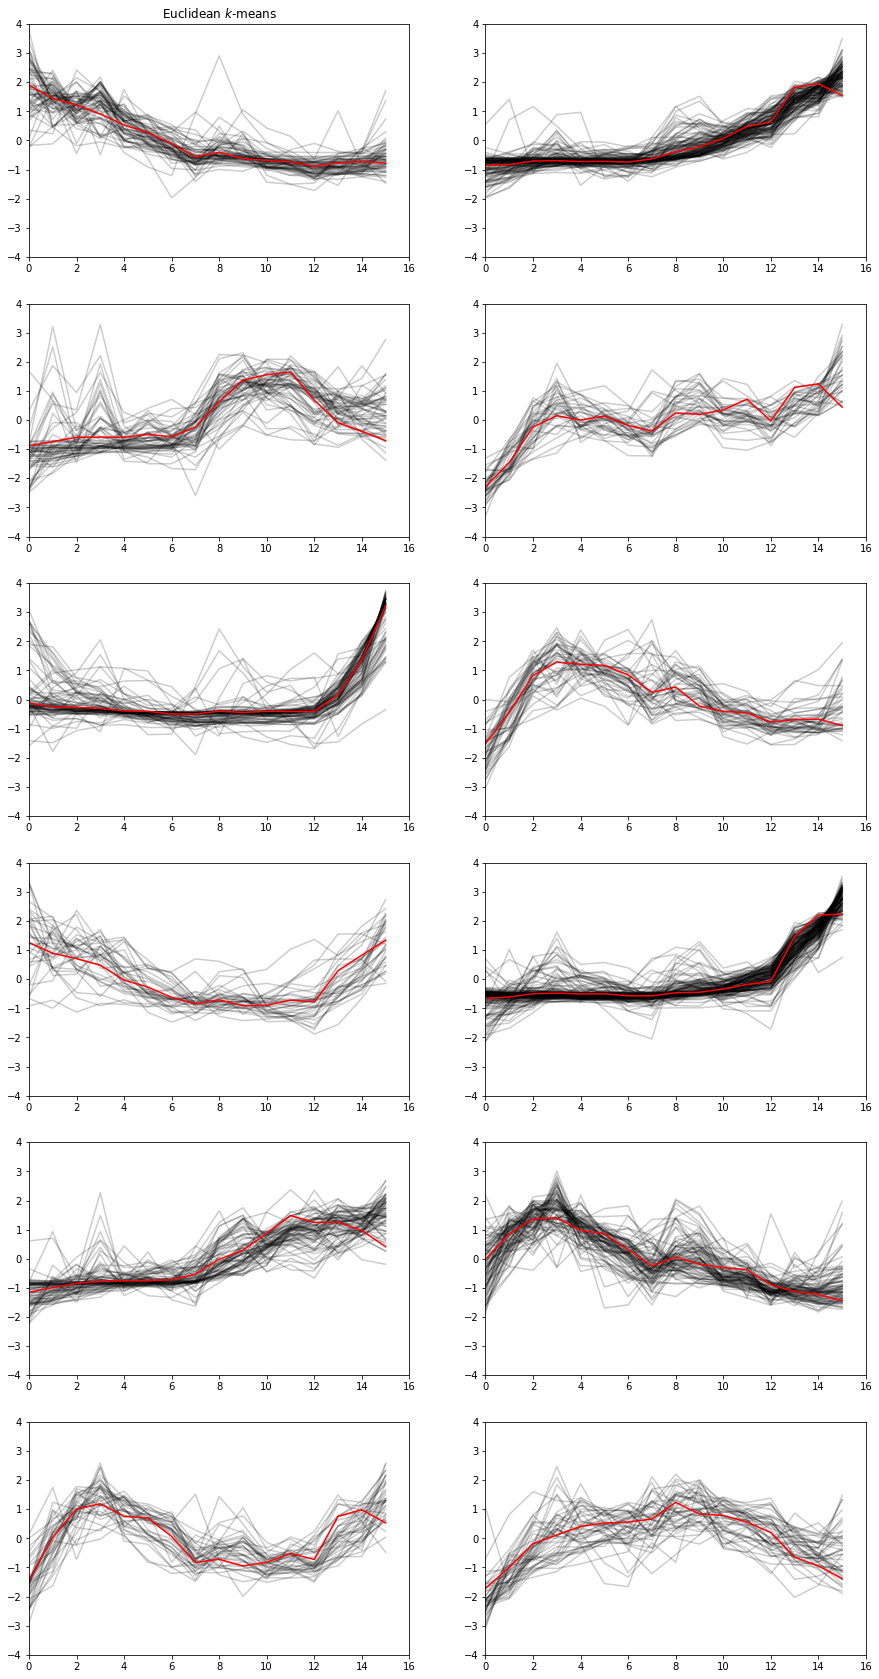

In [33]:
X_test = TimeSeriesScalerMeanVariance().fit_transform(AS19_FUP_data)
sz = X_train.shape[1]

numpy.random.seed(seed)
# Euclidean k-means
print("Euclidean k-means")


plt.figure(figsize=(15,30))
for yi in range(k):
    plt.subplot(k/2, 2, yi + 1)
    for xx in X_test[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    if yi == 0:
        plt.title("Euclidean $k$-means")
# plt.savefig('Figures/k-means_AA13_3D7.png')